In [1]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [2]:
#conda install pydotplus

In [3]:
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [4]:
print(df.head())
print(y[0:5])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0]


In [19]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(min_samples_split=10)
dtree.fit(df,y)

DecisionTreeClassifier(min_samples_split=10)

In [20]:
from IPython.display import Image  
from io import StringIO  
from sklearn.tree import export_graphviz
import pydot
features = list(df.columns)
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
#conda install pydot

In [22]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

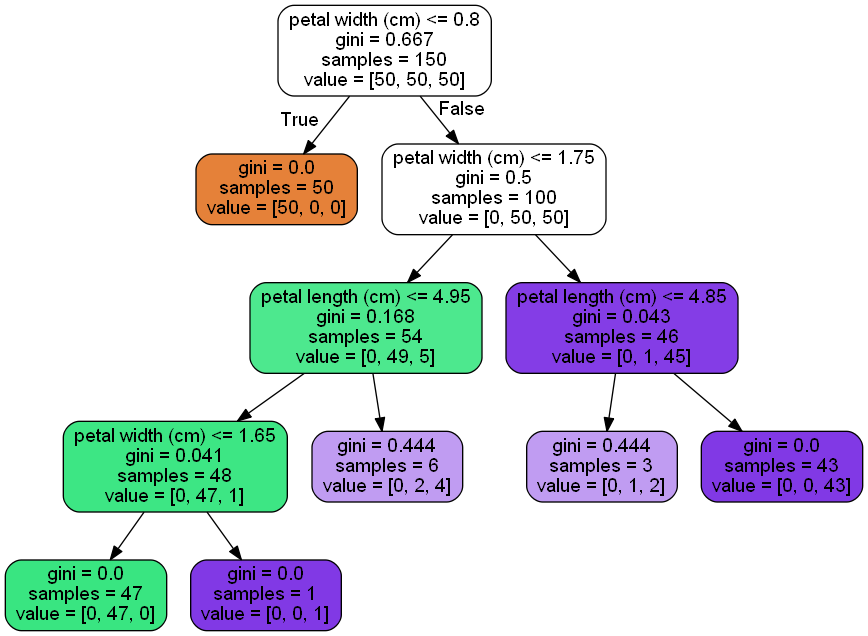

In [23]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [24]:
from sklearn.model_selection import train_test_split
X=df
Y=y
tr_x, ts_x, tr_y, ts_y=train_test_split(X,Y, test_size=0.3,random_state=123)

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(tr_x,tr_y)

DecisionTreeClassifier()

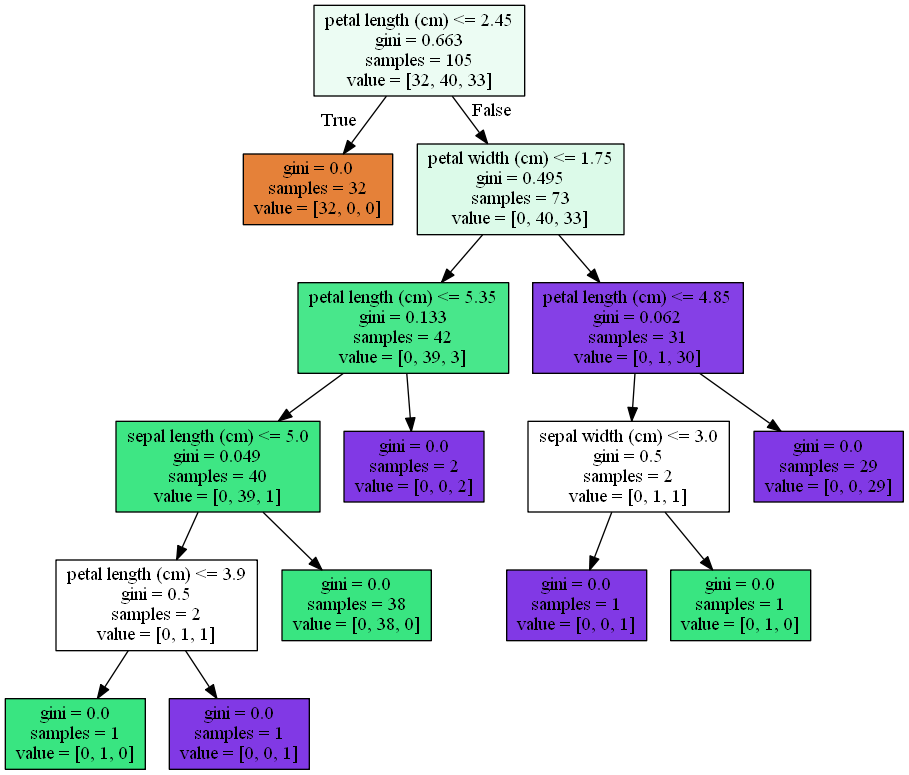

In [26]:
from IPython.display import Image  
from io import StringIO  
from sklearn.tree import export_graphviz
import pydot 
features = list(tr_x.columns)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=False)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [27]:
ts_x[0:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
72,6.3,2.5,4.9,1.5
112,6.8,3.0,5.5,2.1
132,6.4,2.8,5.6,2.2
88,5.6,3.0,4.1,1.3
37,4.9,3.6,1.4,0.1


In [28]:
ts_y

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [29]:
pred=dtree.predict(ts_x)
pred

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [30]:
from sklearn.metrics import classification_report, accuracy_score
accuracy_score(ts_y, pred)

0.9555555555555556

In [31]:
print(classification_report(ts_y,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



## Store Model

In [18]:
import pickle

In [32]:
# Save to file in the current working directory
pkl_filename = "Model_3005_DT.pkl"
with open(pkl_filename, 'wb') as file:  #wb= write binary
    pickle.dump(dtree, file)

In [35]:
# Load from file
pkl_filename = "Model_3005_DT.pkl"
with open(pkl_filename, 'rb') as file:   #rb= read binary
    pickle_model = pickle.load(file)

In [36]:
pickle_model

DecisionTreeClassifier()

In [37]:
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [41]:
inputs=df.iloc[[12,68,119],]
print(df.iloc[[12,68,119],])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
12                 4.8               3.0                1.4               0.1
68                 6.2               2.2                4.5               1.5
119                6.0               2.2                5.0               1.5


In [42]:
print(y[[12,68,119]])

[0 1 2]


In [43]:
pickle_model.predict(inputs)

array([0, 1, 1])

In [62]:
import random
t=random.sample(range(0,149),10)
print(t)

[140, 52, 75, 55, 30, 141, 66, 42, 29, 127]


In [63]:
y[t]

array([2, 1, 1, 1, 0, 2, 1, 0, 0, 2])

In [64]:
pickle_model.predict(df.iloc[t,:])

array([2, 1, 1, 1, 0, 2, 1, 0, 0, 2])